In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('flights.csv')
df.head()

,MONTH,DAY,WEEKDAY,AIRLINE,ORG_AIR,DEST_AIR,SCHED_DEP,DEP_DELAY,AIR_TIME,DIST,SCHED_ARR,ARR_DELAY,DIVERTED,CANCELLED
0,1,1,4,WN,LAX,SLC,1625,58.0,94.0,590,1905,65.0,0,0
1,1,1,4,UA,DEN,IAD,823,7.0,154.0,1452,1333,-13.0,0,0
2,1,1,4,MQ,DFW,VPS,1305,36.0,85.0,641,1453,35.0,0,0
3,1,1,4,AA,DFW,DCA,1555,7.0,126.0,1192,1935,-7.0,0,0
4,1,1,4,WN,LAX,MCI,1720,48.0,166.0,1363,2225,39.0,0,0


a.- Mostrar el número de vuelos cancelados por aerolínea por día

In [2]:
df.loc[df['CANCELLED'] == 1,['DAY','AIRLINE','CANCELLED']].groupby(['DAY','AIRLINE']).count()

CANCELLED
DAY AIRLINE           
1   AA              11
    DL               1
    EV               5
    F9               2
    MQ              16
    OO               6
    UA               6
    US               3
    VX               1
    WN               2
2   AA               3
    DL               3
    EV               5
    MQ              11
    OO               2
    UA               4
    WN               5
3   EV               3
    F9               1
    MQ               9
    OO              11
    UA               2
    US               1
    WN               4
4   AA               3
    DL               2
    EV               5
    F9               2
    MQ               8
    OO               4
...                ...
27  MQ               4
    NK               1
    OO               3
    UA              11
    US               4
    WN               5
28  AA              23
    EV              10
    F9               1
    MQ              12
    NK               2
    OO               4
    UA               3
    WN               3
29  AA               2
    EV               2
    MQ               1
    NK               1
    OO               1
    UA               2
    WN               3
30  EV               3
    MQ               2
    OO               2
    UA               5
    WN               2
31  AA               2
    EV               3
    OO               2
    UA               2

[231 rows x 1 columns]

b.- Mostrar el número y porcentaje de vuelos cancelados y desviados por día

In [3]:
df.groupby('DAY')['DIVERTED','CANCELLED'].agg(['sum', lambda percentage: sum(percentage)/ percentage.count()])

DIVERTED           CANCELLED          
         sum  <lambda>       sum  <lambda>
DAY                                       
1          8  0.004338        53  0.028742
2          5  0.002554        33  0.016854
3          3  0.001559        31  0.016112
4          6  0.003119        29  0.015073
5          3  0.001526        37  0.018820
6          3  0.001588        19  0.010058
7          4  0.002084        10  0.005211
8          5  0.002592        32  0.016589
9          3  0.001594        36  0.019129
10         3  0.001596        23  0.012234
11         6  0.003088        17  0.008749
12         3  0.001517        12  0.006070
13         2  0.001029        13  0.006687
14         6  0.003150        13  0.006824
15         3  0.001522        37  0.018772
16         2  0.001021        31  0.015824
17         2  0.001022        36  0.018396
18         5  0.002610        31  0.016180
19         3  0.001516        21  0.010611
20         5  0.002485        24  0.011928
21         8  0.004134        35  0.018088
22         5  0.002636        24  0.012652
23         5  0.002641        34  0.017961
24         5  0.002697        31  0.016721
25         7  0.003597        31  0.015930
26         6  0.003165        39  0.020570
27         4  0.002137        56  0.029915
28         6  0.003120        58  0.030161
29         5  0.002786        12  0.006685
30         4  0.002247        14  0.007865
31         2  0.001955         9  0.008798

c.- Para cada origen y destino, mostrar el total de vuelos, el número y porcentaje de vuelos cancelados y generar estadísticas para el tiempo de vuelo

In [4]:
aggregations4 = {
    'CANCELLED': {
        'Total Flights': 'count',
        'Total Cancelled': 'sum',
        'Percentage Cancelled': lambda percentage: sum(percentage)/ percentage.count()
        
    },
    'AIR_TIME': {
        'Max Time Air' : 'max',
        'Min Time Air' : 'min',
        'Mean Time Air': 'mean'
    },
}
df.pivot_table(index=['ORG_AIR','DEST_AIR'],values=['CANCELLED','AIR_TIME'],aggfunc=aggregations4)

C:\Users\zicry\Anaconda3\envs\tensorflow-keras\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


AIR_TIME                                       CANCELLED  \
                 Max Time Air Mean Time Air Min Time Air Percentage Cancelled   
ORG_AIR DEST_AIR                                                                
ATL     ABE             112.0     96.387097         81.0             0.000000   
        ABQ             189.0    170.500000        156.0             0.000000   
        ABY              34.0     28.578947         25.0             0.000000   
        ACY              94.0     91.333333         85.0             0.000000   
        AEX             100.0     78.725000         69.0             0.000000   
        AGS              37.0     28.819277         23.0             0.000000   
        ALB             121.0    108.181818         96.0             0.000000   
        ANC             443.0    438.500000        434.0             0.000000   
        ASE             192.0    192.000000        192.0             0.000000   
        ATW             118.0    106.400000         94.0             0.000000   
        AUS             153.0    117.571429        104.0             0.000000   
        AVL              46.0     33.892857         29.0             0.000000   
        AVP             101.0     94.214286         87.0             0.000000   
        BDL             124.0    109.750000         95.0             0.014493   
        BHM              63.0     28.800000         23.0             0.011628   
        BMI             126.0     80.095238         70.0             0.000000   
        BNA              46.0     38.574074         32.0             0.000000   
        BOS             152.0    120.776224        105.0             0.013793   
        BQK              47.0     41.379310         35.0             0.000000   
        BTR              84.0     69.618421         60.0             0.000000   
        BTV             131.0    116.785714        109.0             0.000000   
        BUF             106.0     93.214286         86.0             0.000000   
        BWI             136.0     80.540984         71.0             0.000000   
        BZN             219.0    219.000000        219.0             0.000000   
        CAE              40.0     33.397260         29.0             0.000000   
        CAK              98.0     72.964286         64.0             0.000000   
        CHA              57.0     24.121622         19.0             0.013333   
        CHO              78.0     66.928571         55.0             0.000000   
        CHS             105.0     42.935484         37.0             0.000000   
        CID             118.0     99.481481         88.0             0.000000   
...                       ...           ...          ...                  ...   
SFO     MSP             228.0    189.380282        169.0             0.013889   
        MSY             224.0    209.000000        200.0             0.000000   
        OGG             342.0    299.877551        270.0             0.000000   
        OKC             177.0    162.300000        141.0             0.000000   
        ONT              71.0     60.042857         52.0             0.014085   
        ORD             272.0    216.207729        189.0             0.009390   
        OTH              78.0     69.166667         62.0             0.250000   
        PDX             100.0     78.830000         71.0             0.000000   
        PHL             313.0    287.633333        265.0             0.032258   
        PHX             104.0     91.176923         80.0             0.015152   
        PIT             268.0    256.200000        244.0             0.000000   
        PSC              86.0     78.800000         74.0             0.166667   
        PSP              77.0     63.230769         56.0             0.015152   
        RDD              50.0     37.809524         31.0             0.086957   
        RDM              87.0     67.842105         60.0             0.050000   
        RDU             293.0    275.588235        2

d.- Mostrar la distribución de aerolíneas que vuelan en los siguientes rangos de distancias: [0, 200, 500, 1000, 2000, 2001+]

In [5]:
df.pivot_table(index=[pd.cut(df['DIST'],[0,200,500,1000,2000,5000]),'AIRLINE'],values=['DIST'],aggfunc={'DIST':[np.mean, np.min, np.max]})

DIST                     
                        amax    amin         mean
DIST         AIRLINE                             
(0, 200]     AA        190.0   175.0   186.288660
             DL        196.0   106.0   147.356250
             EV        196.0    74.0   149.386617
             MQ        196.0    89.0   146.933673
             OO        199.0    67.0   125.487201
             UA        192.0   108.0   164.921569
             WN        197.0   197.0   197.000000
(200, 500]   AA        493.0   224.0   305.599294
             AS        421.0   421.0   421.000000
             B6        414.0   231.0   335.422018
             DL        489.0   214.0   341.138852
             EV        500.0   201.0   348.295445
             F9        495.0   373.0   422.243590
             MQ        500.0   212.0   325.957862
             NK        460.0   236.0   324.925532
             OO        495.0   201.0   344.516475
             UA        495.0   224.0   357.016244
             US        370.0   226.0   306.751969
             VX        447.0   236.0   363.392857
             WN        495.0   223.0   344.961663
(500, 1000]  AA        989.0   507.0   767.171544
             AS        954.0   550.0   820.027083
             B6        867.0   740.0   796.213115
             DL        991.0   503.0   701.085923
             EV        986.0   501.0   687.799519
             F9        991.0   507.0   760.645120
             MQ        999.0   501.0   684.109641
             NK        986.0   515.0   758.842623
             OO        996.0   503.0   687.847203
             UA        991.0   524.0   797.950166
             US        980.0   507.0   729.351816
             VX        954.0   550.0   743.324324
             WN        991.0   507.0   734.943958
(1000, 2000] AA       1999.0  1005.0  1377.087386
             AS       1874.0  1009.0  1359.548673
             B6       1754.0  1562.0  1649.148936
             DL       1995.0  1008.0  1497.975662
             EV       1330.0  1008.0  1088.628959
             F9       1947.0  1005.0  1408.358621
             MQ       1250.0  1041.0  1174.923077
             NK       1979.0  1005.0  1393.112500
             OO       1735.0  1009.0  1268.083460
             UA       1956.0  1005.0  1470.615085
             US       1999.0  1009.0  1470.691638
             VX       1846.0  1246.0  1578.662791
             WN       1999.0  1009.0  1434.385430
(2000, 5000] AA       3784.0  2072.0  2449.242424
             AS       2846.0  2182.0  2370.489362
             B6       2704.0  2072.0  2452.429448
             DL       4502.0  2036.0  2344.664748
             F9       2218.0  2039.0  2082.266667
             HA       2917.0  2338.0  2615.178571
             NK       2381.0  2052.0  2209.346154
             UA       4243.0  2007.0  2481.376280
             US       2979.0  2075.0  2288.401515
             VX       2704.0  2218.0  2482.535117
             WN       2329.0  2026.0  2144.760638

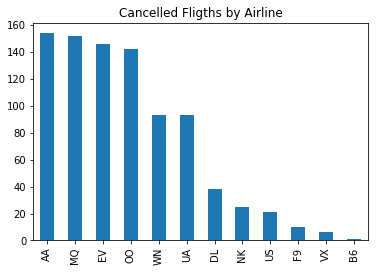

In [6]:
fig = plt.figure()
df.AIRLINE[df.CANCELLED==1].value_counts().plot(kind='bar')
plt.title('Cancelled Fligths by Airline')
plt.show()

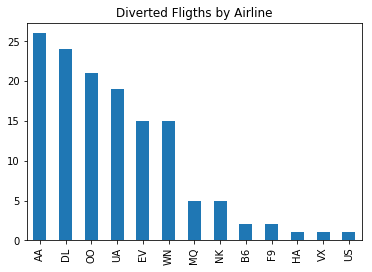

In [7]:
fig = plt.figure()
df.AIRLINE[df.DIVERTED==1].value_counts().plot(kind='bar')
plt.title('Diverted Fligths by Airline')
plt.show()

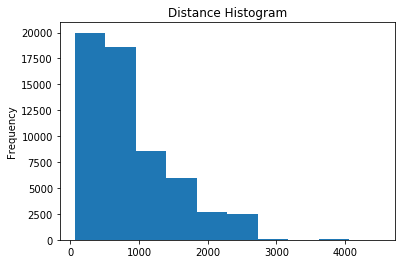

In [8]:
fig = plt.figure()
df.DIST.plot(kind='hist')
plt.title('Distance Histogram')
plt.show()

<Figure size 432x288 with 0 Axes>

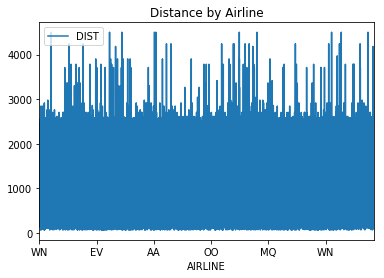

In [9]:
fig = plt.figure()
df.plot.line(x='AIRLINE',y='DIST')
plt.title('Distance by Airline')
plt.show()